In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# Download dataset from drive, Skip this part if you already have the dataset downloaded

!gdown --id 1Qh4qLch1if2Gta39t4qRoULCRZYFl1XA
!gdown --id 16m6eYD8zUjD49xT6fIYqzTF8gF0Im_NR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Qh4qLch1if2Gta39t4qRoULCRZYFl1XA
To: /content/train.csv
100% 30.8M/30.8M [00:00<00:00, 37.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16m6eYD8zUjD49xT6fIYqzTF8gF0Im_NR
To: /content/test.csv
100% 3.59M/3.59M [00:00<00:00, 246MB/s]


In [ ]:
###################

In [ ]:
# Load files and assign variables to X and Y
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Define train and test set
X_train = train.iloc[:,2:]
Y_train = train['labels']
X_test = test.iloc[:,2:]
Y_test = test['labels']

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,132,135,132,131,134,134,135,136,133,134,...,85,125,125,121,122,126,125,126,125,126
1,183,188,188,189,190,189,193,197,201,202,...,20,19,24,21,19,19,20,11,12,8
2,128,127,127,128,127,129,126,125,127,128,...,118,116,119,118,114,118,115,116,113,107
3,150,154,152,151,153,153,154,155,154,155,...,145,145,144,144,140,144,145,142,143,145
4,184,183,183,184,183,184,186,184,187,188,...,123,119,120,117,120,148,147,139,131,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,255,255,255,255,255,255,255,255,255,255,...,254,254,252,252,141,32,19,88,13,22
10526,171,173,177,179,180,181,181,185,190,188,...,26,24,28,31,27,40,235,242,240,210
10527,128,130,128,128,129,128,128,128,129,131,...,97,91,87,84,80,83,82,125,123,122
10528,132,134,132,132,130,129,130,135,137,137,...,126,105,80,90,95,95,98,91,58,128


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,132,131,129,131,130,132,133,136,135,136,...,77,93,71,82,100,116,121,113,93,126
1,184,182,182,182,182,182,179,181,182,182,...,166,164,164,166,164,161,162,163,163,160
2,126,127,126,127,107,85,118,131,131,131,...,104,103,119,117,117,115,116,114,115,113
3,128,132,128,131,129,133,132,131,131,133,...,84,89,91,91,82,83,106,124,124,123
4,130,131,133,133,133,130,130,135,137,137,...,115,119,116,122,68,91,111,109,93,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,194,193,193,192,194,195,195,197,199,199,...,187,187,186,188,187,187,186,186,186,181
1166,165,168,167,165,164,163,165,166,165,167,...,107,128,146,147,147,147,145,147,145,147
1167,131,131,131,130,130,129,134,128,129,136,...,112,111,113,116,111,113,111,112,113,113
1168,137,137,136,137,138,138,138,136,136,136,...,117,118,77,66,88,111,123,122,108,106


In [ ]:
# Show image from dataset
def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [ ]:
def gen_image_og(image):
  """Return 224x224 image given grayscale values"""
  pixels = image.reshape((224,224))
  plt.imshow(pixels)
  plt.show()

In [ ]:
# gen_image_og(np.array(X_test.iloc[4]))

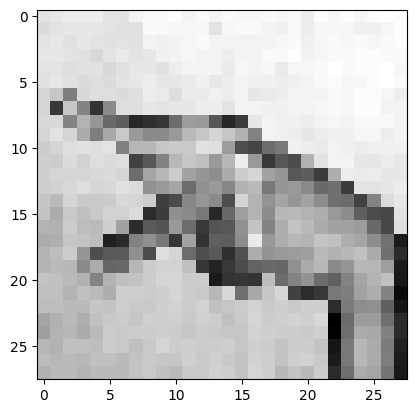

In [ ]:
# Get image from training set
gen_image(np.array(X_test.iloc[4]))

In [ ]:
# Assign numbers to corresponding label
label_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',\
             18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y', 25: 'Z'}
label_dict_rev = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8, 'J': 9, 'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,\
                 'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24, 'Z':25}

Y_test1 = []
for i in Y_test:
    Y_test1.append(label_dict_rev.get(label_dict.get(i)))

Y_test2 = to_categorical(Y_test1, num_classes = 26)
Y_train = train['labels']

Y_train1 = []
for i in Y_train:
    Y_train1.append(label_dict_rev.get(label_dict.get(i)))

# Classes labeled as 1-24; Need to change to 0-23 for to_categorical
Y_train2 = to_categorical(Y_train1, num_classes = 26)
X_train = train.iloc[:,2:]

In [ ]:
# Normalize pixels
X_train1 = X_train/255
X_test1 = X_test/255

In [ ]:
X_train1.shape

(10530, 784)

In [ ]:
# Convert data to 2D form to represent height x width
X_train2 = X_train1.values.reshape(-1,28,28,1)
X_test2 = X_test1.values.reshape(-1,28,28,1)

# X_train2 = np.expand_dims(X_train1.values, -1)
# X_test2 = np.expand_dims(X_test1.values, -1)

# Split training set into 10% validation and 90% training
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train2, Y_train2, test_size = 0.3, random_state=42, stratify=Y_train2)

In [ ]:
X_tr.shape

(7371, 28, 28, 1)

In [ ]:
# First 4 layers of model
model = Sequential()
# Layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2))) # downsampling
model.add(Dropout(0.25)) # Dropout reduces overfitting
# Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='Same'))  ##padding
model.add(Dropout(0.25))
# Fully connected layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# use categorical crossentropy as loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define model parameters
epochs = 100
batch_size = 32
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping( # we apply earlystopping to prevent overfitting
            monitor='val_loss',
            patience=3, # we choose patience=3 to stop the model fit if val_loss won't decrease for 3 epoch
            restore_best_weights=True) # choose the best weights when early-stopping

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
# Fit model - Use first line when predicting and second "final" line when using validation set to find # of epochs

# model.fit(X_train2, Y_train2, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])
final = model.fit(X_tr, Y_tr, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/100
231/231 [==============================] - 17s 12ms/step - loss: 2.8619 - accuracy: 0.1813 - val_loss: 1.7380 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 2/100
231/231 [==============================] - 2s 8ms/step - loss: 1.5037 - accuracy: 0.5557 - val_loss: 0.9071 - val_accuracy: 0.7398 - lr: 0.0010
Epoch 3/100
231/231 [==============================] - 2s 10ms/step - loss: 0.9086 - accuracy: 0.7254 - val_loss: 0.4868 - val_accuracy: 0.8655 - lr: 0.0010
Epoch 4/100
231/231 [==============================] - 2s 9ms/step - loss: 0.6096 - accuracy: 0.8158 - val_loss: 0.2944 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 5/100
231/231 [==============================] - 3s 13ms/step - loss: 0.4532 - accuracy: 0.8584 - val_loss: 0.2123 - val_accuracy: 0.9481 - lr: 0.0010
Epoch 6/100
231/231 [==============================] - 1s 5ms/step - loss: 0.3414 - accuracy: 0.8932 - val_loss: 0.1873 - val_accuracy: 0.9601 - lr: 0.0010
Epoch 7/100
231/231 [==============================] - 1s 6m

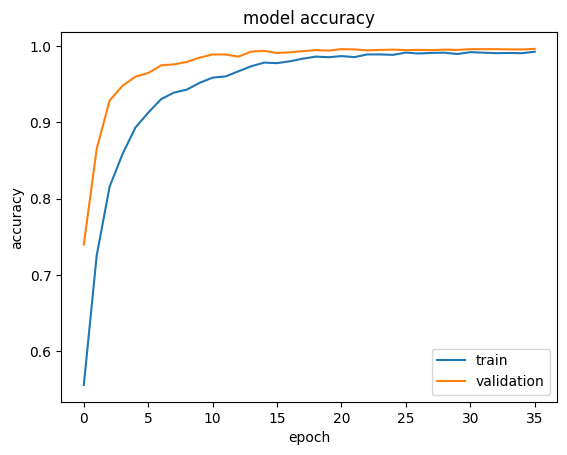

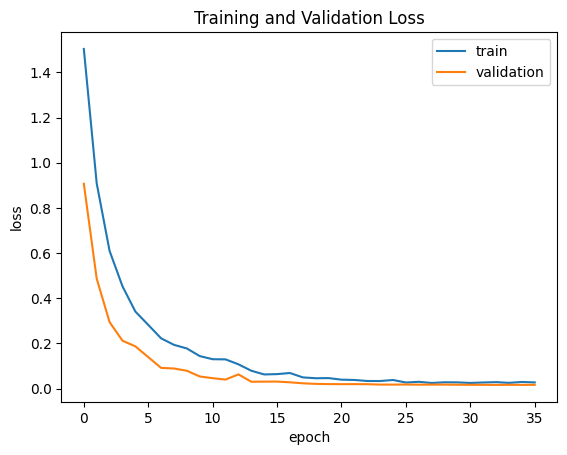

In [ ]:
# # Plot training and validation accuracy
plt.plot(final.history['accuracy'][1:])
plt.plot(final.history['val_accuracy'][1:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
# plt.ylim((0.9,1)) # limit y-axis to 90-100% accuracy
plt.show()

# Plot training and validation loss
plt.plot(final.history['loss'][1:])
plt.plot(final.history['val_loss'][1:])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
final.model.evaluate(X_test2, Y_test2)


37/37 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.8111


[0.5731280446052551, 0.8111110925674438]

In [ ]:
final.model.save("Comp/mnist_model_final.h5")
!mkdir -p saved_model
final.model.save('saved_model/my_model')
np.save('history_mnist.npy',final.history)
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/saved_model.pb (deflated 89%)
  adding: saved_model/my_model/assets/ (stored 0%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 90%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: saved_model/my_model/variables/variables.index (deflated 57%)
  adding: saved_model/my_model/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files
files.download("saved_model.zip")
files.download("Comp/mnist_model_final.h5")
files.download("history_mnist.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results = model.predict(X_test2) # predict test labels
Y_pred_classes = np.argmax(results, axis = 1) # Convert predictions classes to one hot vectors
Y_true = np.argmax(Y_test2,axis = 1) # Convert validation observations to one hot vectors

37/37 [==============================] - 0s 2ms/step


In [ ]:
X_tr.shape

(7371, 28, 28, 1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

results = model.predict(X_test2) # predict test labels
Y_pred_classes = np.argmax(results, axis = 1) # Convert predictions classes to one hot vectors
Y_true = np.argmax(Y_test2,axis = 1) # Convert validation observations to one hot vectors
labels = ["A", "B", "C", "D", "E", "F","G","H","I","J","K","L", "M", "N", "O",
                "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

classif_report = classification_report(Y_true, Y_pred_classes, target_names = labels)

37/37 [==============================] - 0s 2ms/step


In [ ]:
print(classif_report)

              precision    recall  f1-score   support

           A       0.88      1.00      0.94        45
           B       0.94      0.64      0.76        45
           C       0.68      1.00      0.81        45
           D       0.74      1.00      0.85        45
           E       0.92      1.00      0.96        45
           F       0.74      0.96      0.83        45
           G       0.68      1.00      0.81        45
           H       0.82      1.00      0.90        45
           I       0.92      1.00      0.96        45
           J       0.94      0.76      0.84        45
           K       1.00      1.00      1.00        45
           L       0.98      0.91      0.94        45
           M       0.76      0.58      0.66        45
           N       0.74      0.96      0.83        45
           O       0.90      0.40      0.55        45
           P       1.00      0.40      0.57        45
           Q       0.90      0.78      0.83        45
           R       0.61    

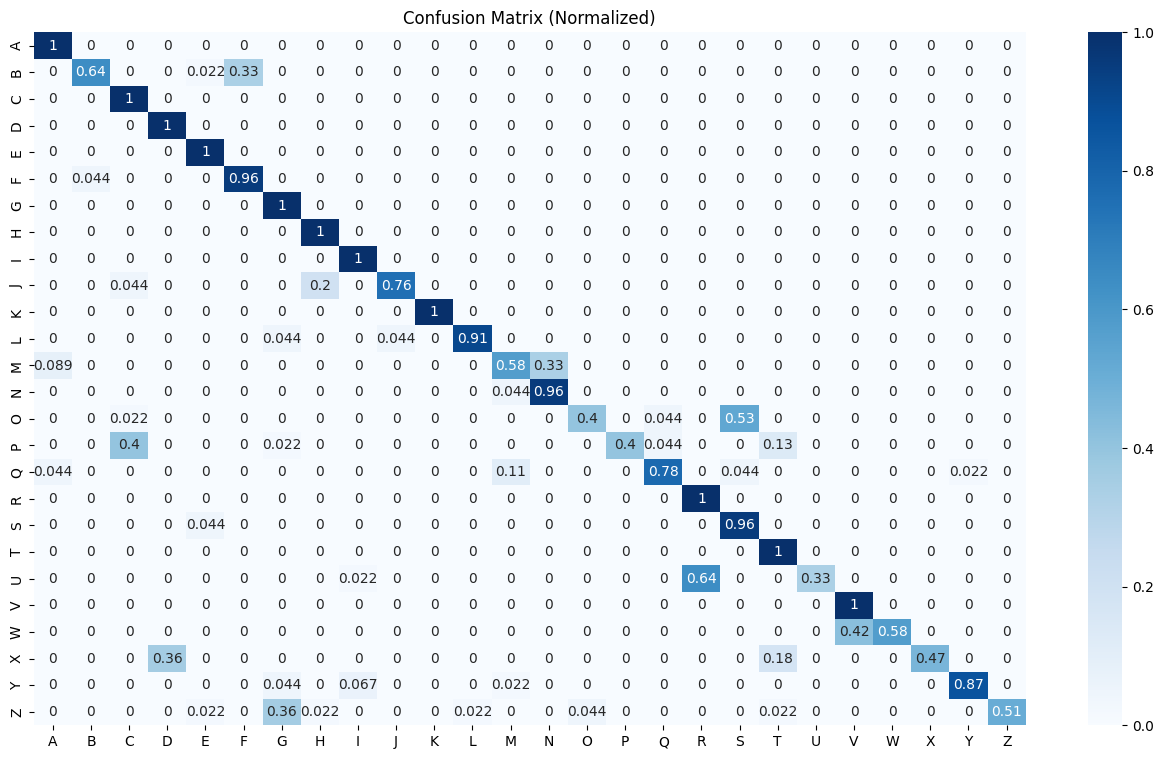

In [ ]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes, normalize = 'true')
plt.figure(figsize = (16,9))
sns.heatmap(confusion_mtx, cmap='Blues',annot=True, xticklabels = sorted(set(labels)), yticklabels = sorted(set(labels)))
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [ ]:
#Model conversion to ONNX

!pip install onnx==1.12
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery 3.9.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery-storage 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.


In [ ]:
!python -m tf2onnx.convert --saved-model saved_model/my_model --output saved_model-mnist.onnx


2023-06-17 02:54:16.660195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-06-17 02:54:19.697605: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-06-17 02:54:19,698 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2023-06-17 02:54:20,172 - INFO - Signatures found in model: [serving_default].
2023-06-17 02:54:20,172 - WARNING - '--signature_def' not specified, using first signature: serving_default
2023-06-17 02:54:20,172 - INFO - Output names: ['dense_1']
2023-06-17 02:54:20,324 - INFO - Using tensorflow=2.12.0, onnx=1.12.0, tf2onnx=1.

In [ ]:
files.download("saved_model-mnist.onnx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>